# Tarea 3

In [1]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import pandas as pd

## Pregunta 1 

### 1.a)

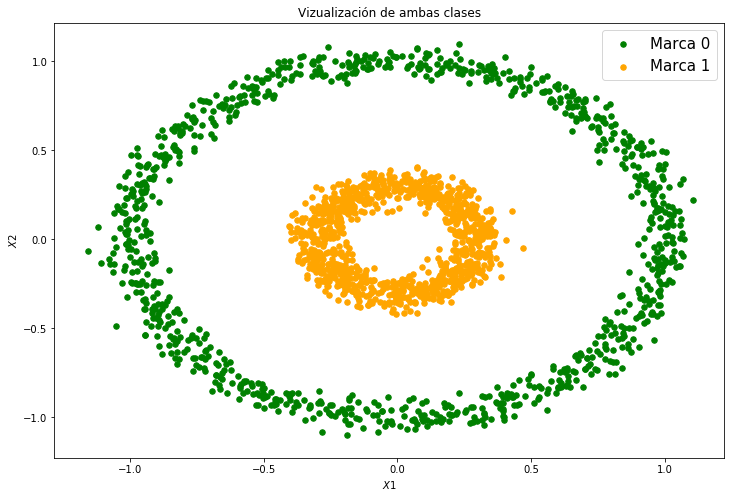

In [2]:
from sklearn.utils import check_random_state
from sklearn.model_selection import train_test_split
def do_circles(n=2000,noisy_n=0.05):
    generator = check_random_state(10)
    linspace = np.linspace(0, 2 * np.pi, n // 2 + 1)[:-1]
    outer_circ_x = np.cos(linspace)
    outer_circ_y = np.sin(linspace)
    inner_circ_x = outer_circ_x * .3
    inner_circ_y = outer_circ_y * .3
    X = np.vstack((np.append(outer_circ_x, inner_circ_x), np.append(outer_circ_y, inner_circ_y))).T
    y = np.hstack([np.zeros(n // 2, dtype=np.intp), np.ones(n // 2, dtype=np.intp)])
    X += generator.normal(scale=noisy_n, size=X.shape)

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)
    return X_train,y_train,X_test,y_test

def plot_classifier(clf,X_train,Y_train,X_test,Y_test,model_type):
    f, axis = plt.subplots(1, 1, sharex='col', sharey='row',figsize=(12, 8))
    axis.scatter(X_train[:,0],X_train[:,1],s=30,c=Y_train,zorder=10,cmap='cool')
    axis.scatter(X_test[:,0],X_test[:,1],s=20,c=Y_test,zorder=10,cmap='Greys')
    XX, YY = np.mgrid[-2:2:200j, -2:2:200j]
    if model_type == 'tree':
        Z = clf.predict_proba(np.c_[XX.ravel(), YY.ravel()])[:,0]
    elif model_type == 'ann':
        Z = clf.predict(np.c_[XX.ravel(), YY.ravel()])
    else: raise ValueError('model type not supported')
    Z = Z.reshape(XX.shape)
    Zplot = Z >= 0.5
    axis.pcolormesh(XX, YY, Zplot ,cmap='YlGn')
    axis.contour(XX, YY, Z, alpha=1, colors=["k", "k", "k"], linestyles=["--", "-", "--"],levels=[-2, 0, 2])
    plt.show()
    
#=======grafico de los datos==============
X_train,Y_train,X_test,Y_test=do_circles()
plt.figure(figsize = (12, 8))
plt.scatter([X_train[i,0] for i in range(len(Y_train)) if Y_train[i] == 0],[X_train[i,1] for i in range(len(Y_train)) if Y_train[i] == 0], s=30, c = "green")
plt.scatter([X_train[i,0] for i in range(len(Y_train)) if Y_train[i] == 1],[X_train[i,1] for i in range(len(Y_train)) if Y_train[i] == 1], s=30, c = "orange")
plt.scatter([X_test[i,0] for i in range(len(Y_test)) if Y_test[i] == 0],[X_test[i,1] for i in range(len(Y_test)) if Y_test[i] == 0], s=30, c = "green")
plt.scatter([X_test[i,0] for i in range(len(Y_test)) if Y_test[i] == 1],[X_test[i,1] for i in range(len(Y_test)) if Y_test[i] == 1], s=30, c = "orange")
plt.xlabel("$X1$")
plt.ylabel("$X2$")
plt.legend(['Marca 0','Marca 1'],prop={'size': 15})
plt.title("Vizualización de ambas clases")
plt.show()


<p>Se logra apreciar las distribuciones de los distintos datos con sus repectivas etiquetas, dejando en claro que estamos frente a un problema que no es linealmente separable.</p>

### 1.b)

Using TensorFlow backend.


Epoch 1/50
1000/1000 [==============================] - 0s 175us/step - loss: 0.6941 - acc: 0.5010
Epoch 2/50
1000/1000 [==============================] - 0s 9us/step - loss: 0.6936 - acc: 0.5070
Epoch 3/50
1000/1000 [==============================] - 0s 11us/step - loss: 0.6944 - acc: 0.4950
Epoch 4/50
1000/1000 [==============================] - 0s 11us/step - loss: 0.6942 - acc: 0.4890
Epoch 5/50
1000/1000 [==============================] - 0s 11us/step - loss: 0.6928 - acc: 0.5070
Epoch 6/50
1000/1000 [==============================] - 0s 11us/step - loss: 0.6924 - acc: 0.5130
Epoch 7/50
1000/1000 [==============================] - 0s 9us/step - loss: 0.6903 - acc: 0.5440
Epoch 8/50
1000/1000 [==============================] - 0s 9us/step - loss: 0.6847 - acc: 0.5580
Epoch 9/50
1000/1000 [==============================] - 0s 9us/step - loss: 0.6676 - acc: 0.6290
Epoch 10/50
1000/1000 [==============================] - 0s 9us/step - loss: 0.6413 - acc: 0.6520
Epoch 11/50
1000/1000 [

C:\Users\Gabriel\Anaconda3\lib\site-packages\matplotlib\contour.py:1180: UserWarning: No contour levels were found within the data range.
  warnings.warn("No contour levels were found"


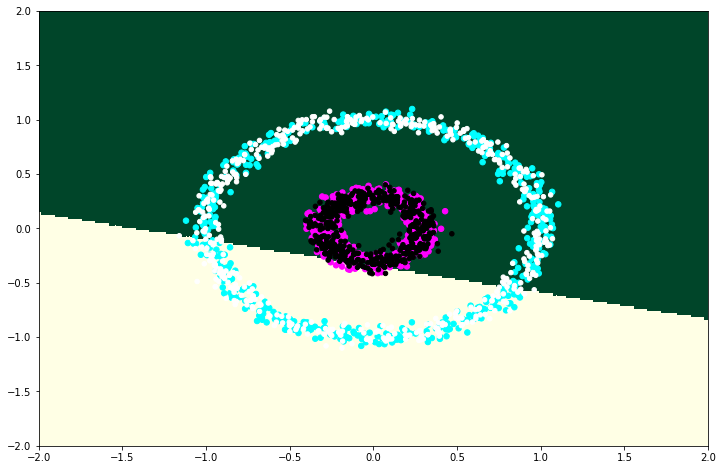

In [3]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD

model = Sequential()
model.add(Dense(1,input_dim=X_train.shape[1], kernel_initializer='uniform', activation='relu'))
model.add(Dense(1, kernel_initializer='uniform', activation='sigmoid'))
model.compile(optimizer=SGD(lr=1), loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, Y_train,epochs=50, batch_size=100, verbose=1)
scores = model.evaluate(X_test, Y_test)
test_acc = scores[1]

plot_classifier(model,X_train,Y_train,X_test,Y_test,"ann")

Se logra apreciar que el problema en redes neuronales de una neurona se está tratando como uno linealmente separable, siendo que claramente no es así. Con este resultado, uno puede decir que el problema no tendrá solución, independiente de las modificaciones que se puedan hacer. Se logra apreciar además que los errores obtenidos son inexactos, ya que a pesar que de se obtienen valores cercanos al 50% de error, se ve que el problema no está bien ajustado a lo que de verdad se está intentando clasificar.

### 1.c)

Epoch 1/50
1000/1000 [==============================] - 1s 568us/step - loss: 0.6953 - acc: 0.4970
Epoch 2/50
1000/1000 [==============================] - 0s 10us/step - loss: 0.6943 - acc: 0.4930
Epoch 3/50
1000/1000 [==============================] - 0s 11us/step - loss: 0.6937 - acc: 0.4870
Epoch 4/50
1000/1000 [==============================] - 0s 10us/step - loss: 0.6919 - acc: 0.5030
Epoch 5/50
1000/1000 [==============================] - 0s 11us/step - loss: 0.6889 - acc: 0.5760
Epoch 6/50
1000/1000 [==============================] - 0s 10us/step - loss: 0.6806 - acc: 0.5990
Epoch 7/50
1000/1000 [==============================] - 0s 11us/step - loss: 0.6652 - acc: 0.5960
Epoch 8/50
1000/1000 [==============================] - 0s 10us/step - loss: 0.6359 - acc: 0.6470
Epoch 9/50
1000/1000 [==============================] - 0s 11us/step - loss: 0.6088 - acc: 0.6740
Epoch 10/50
1000/1000 [==============================] - 0s 10us/step - loss: 0.5876 - acc: 0.6850
Epoch 11/50
1000/1

C:\Users\Gabriel\Anaconda3\lib\site-packages\matplotlib\contour.py:1180: UserWarning: No contour levels were found within the data range.
  warnings.warn("No contour levels were found"


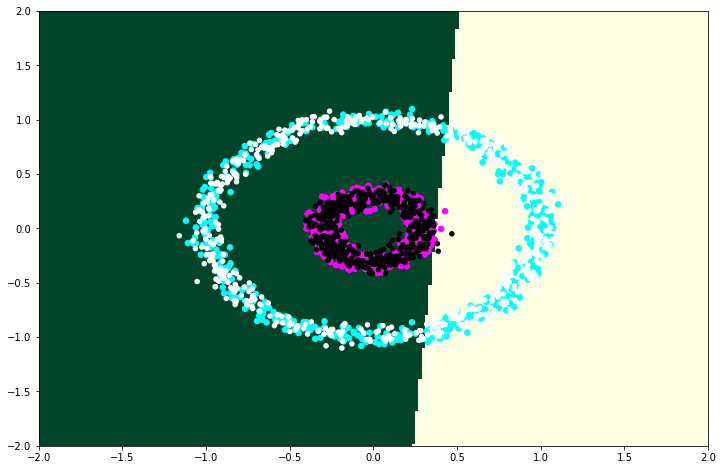

Epoch 1/50
1000/1000 [==============================] - 1s 556us/step - loss: 0.6934 - acc: 0.5050
Epoch 2/50
1000/1000 [==============================] - 0s 11us/step - loss: 0.6942 - acc: 0.5050
Epoch 3/50
1000/1000 [==============================] - 0s 10us/step - loss: 0.6916 - acc: 0.5050
Epoch 4/50
1000/1000 [==============================] - 0s 11us/step - loss: 0.6892 - acc: 0.6240
Epoch 5/50
1000/1000 [==============================] - 0s 11us/step - loss: 0.6779 - acc: 0.7180
Epoch 6/50
1000/1000 [==============================] - 0s 10us/step - loss: 0.6539 - acc: 0.6690
Epoch 7/50
1000/1000 [==============================] - 0s 11us/step - loss: 0.6123 - acc: 0.8140
Epoch 8/50
1000/1000 [==============================] - 0s 11us/step - loss: 0.5448 - acc: 0.8580
Epoch 9/50
1000/1000 [==============================] - 0s 10us/step - loss: 0.4585 - acc: 0.9140
Epoch 10/50
1000/1000 [==============================] - 0s 9us/step - loss: 0.3576 - acc: 0.9500
Epoch 11/50
1000/10

1000/1000 [==============================] - 0s 11us/step - loss: 0.0113 - acc: 1.0000
Epoch 33/50
1000/1000 [==============================] - 0s 10us/step - loss: 0.0106 - acc: 1.0000
Epoch 34/50
1000/1000 [==============================] - 0s 10us/step - loss: 0.0100 - acc: 1.0000
Epoch 35/50
1000/1000 [==============================] - 0s 10us/step - loss: 0.0094 - acc: 1.0000
Epoch 36/50
1000/1000 [==============================] - 0s 10us/step - loss: 0.0090 - acc: 1.0000
Epoch 37/50
1000/1000 [==============================] - 0s 10us/step - loss: 0.0085 - acc: 1.0000
Epoch 38/50
1000/1000 [==============================] - 0s 12us/step - loss: 0.0081 - acc: 1.0000
Epoch 39/50
1000/1000 [==============================] - 0s 11us/step - loss: 0.0077 - acc: 1.0000
Epoch 40/50
1000/1000 [==============================] - 0s 10us/step - loss: 0.0074 - acc: 1.0000
Epoch 41/50
1000/1000 [==============================] - 0s 10us/step - loss: 0.0070 - acc: 1.0000
Epoch 42/50
1000/1000 

1000/1000 [==============================] - 0s 10us/step - loss: 0.0817 - acc: 1.0000
Epoch 13/50
1000/1000 [==============================] - 0s 10us/step - loss: 0.0659 - acc: 1.0000
Epoch 14/50
1000/1000 [==============================] - 0s 11us/step - loss: 0.0542 - acc: 1.0000
Epoch 15/50
1000/1000 [==============================] - 0s 10us/step - loss: 0.0456 - acc: 1.0000
Epoch 16/50
1000/1000 [==============================] - 0s 11us/step - loss: 0.0389 - acc: 1.0000
Epoch 17/50
1000/1000 [==============================] - 0s 11us/step - loss: 0.0336 - acc: 1.0000
Epoch 18/50
1000/1000 [==============================] - 0s 10us/step - loss: 0.0294 - acc: 1.0000
Epoch 19/50
1000/1000 [==============================] - 0s 10us/step - loss: 0.0260 - acc: 1.0000
Epoch 20/50
1000/1000 [==============================] - 0s 10us/step - loss: 0.0231 - acc: 1.0000
Epoch 21/50
1000/1000 [==============================] - 0s 10us/step - loss: 0.0208 - acc: 1.0000
Epoch 22/50
1000/1000 

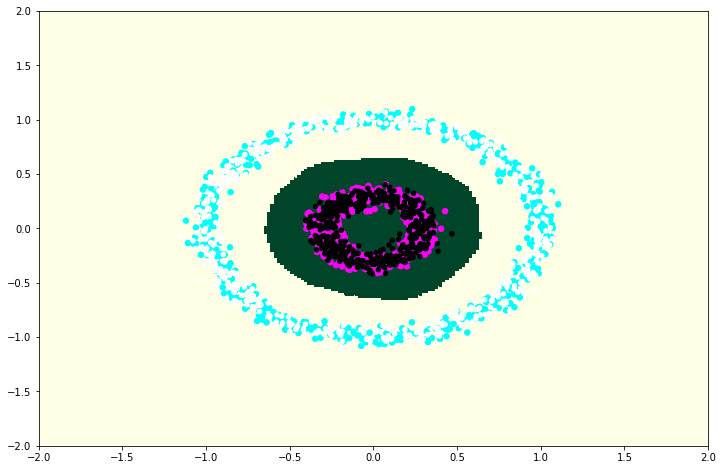

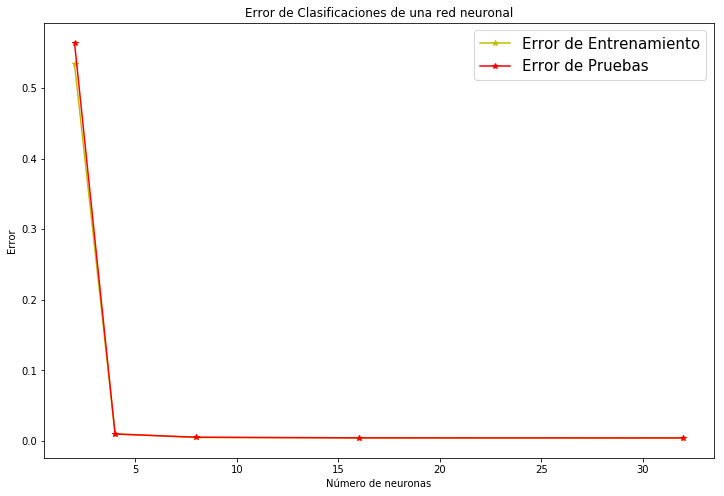

In [12]:
lista=[2**i for i in range(1,6)]
train_err=[]
test_err=[]
for n_h in lista:
    model = Sequential()
    model.add(Dense(n_h, input_dim=X_train.shape[1], kernel_initializer="uniform", activation="relu"))
    model.add(Dense(1, kernel_initializer="uniform", activation="sigmoid"))
    model.compile(optimizer=SGD(lr=1), loss='binary_crossentropy', metrics=['accuracy'])
    model.fit(X_train, Y_train,epochs=50, batch_size=100, verbose=1)
    tr_err = model.evaluate(X_train, Y_train) 
    t_err = model.evaluate(X_test, Y_test)
    train_err.append(tr_err[0])
    test_err.append(t_err[0])
    if n_h==2 or n_h==32:
        plot_classifier(model,X_train,Y_train,X_test,Y_test,"ann")
        

plt.figure(1, figsize = (12, 8))
plt.plot(lista,train_err, "*y-")
plt.plot(lista,test_err, "*r-")
plt.title('Error de Clasificaciones de una red neuronal')
plt.xlabel("Número de neuronas")
plt.ylabel("Error")
plt.legend(["Error de Entrenamiento", "Error de Pruebas"], prop={'size': 15})

plt.show()

Se logra observar como la red neuronal se acopla mejor al problema a medida que se aumenta el número de neuronas. Al observar las gráficas del problema, se aprecia como con 2 neuronas aún se está intentando separar linealmente el problema mientras que con 32, las clasificaciones toman las formas de los conjuntos de datos, separando correctamente estos últimos. Al ver el gráfico de errores, se observa como ambos disminuyen abruptamente al pasar de 2 a 4 neuronas, y como esto sigue en descenso a medida que se aumentan, hasta llegar al mínimo en 32.

### 1.d)

Test Accuracy = 0.670000
1


C:\Users\Gabriel\Anaconda3\lib\site-packages\matplotlib\contour.py:1180: UserWarning: No contour levels were found within the data range.
  warnings.warn("No contour levels were found"


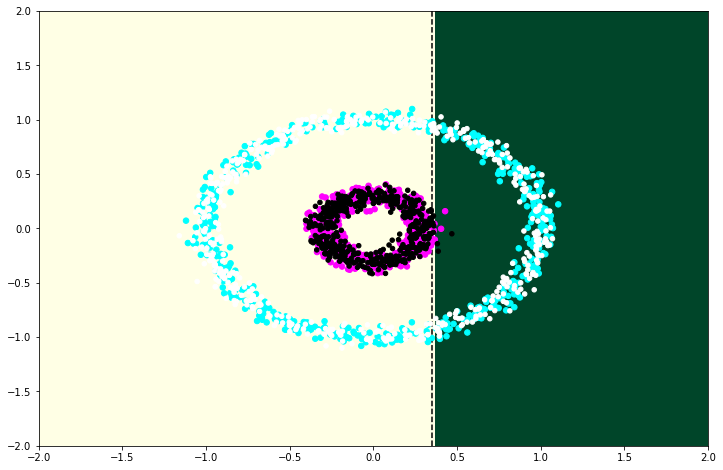

In [13]:
from sklearn.tree import DecisionTreeClassifier as Tree
clf=Tree(criterion='gini',splitter='best',random_state=0,max_depth=1)
clf.fit(X_train,Y_train)
acc_test = clf.score(X_test,Y_test)
print ("Test Accuracy = %f"%acc_test)
print (clf.tree_.max_depth)
plot_classifier(clf,X_train,Y_train,X_test,Y_test,'tree')

Se observa en la gráfica que el problema se intenta separar linealmente (al igual que la primera red neuronal ejecutada) siendo que los datos poseen otra distribución. Es por esto que se puede aplicar la misma explicación dada en las preguntas anteriores, donde no se puede clasificar correctamente y que el error asociado no es representativo. Por otro lado, no resulta necesario variar los paramentros, ya que siendo árboles de decisión de profundidad 1, siempre se tendrán dos conjuntos de datos separados por una recta, lo cual no podrá acoplarse al problema inherentemente

### 1.e)

C:\Users\Gabriel\Anaconda3\lib\site-packages\matplotlib\contour.py:1180: UserWarning: No contour levels were found within the data range.
  warnings.warn("No contour levels were found"


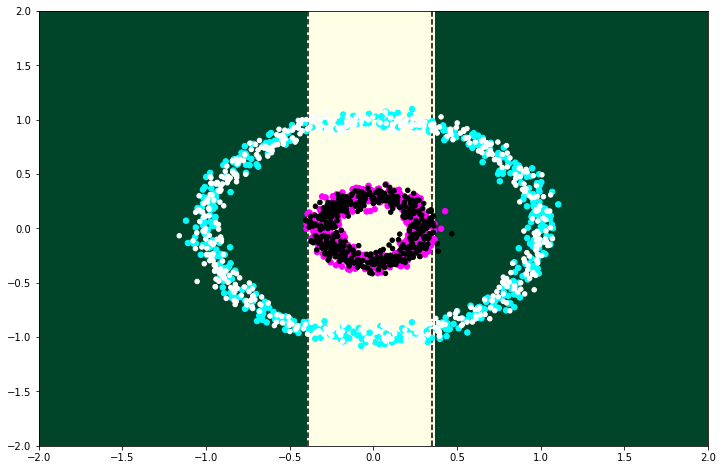

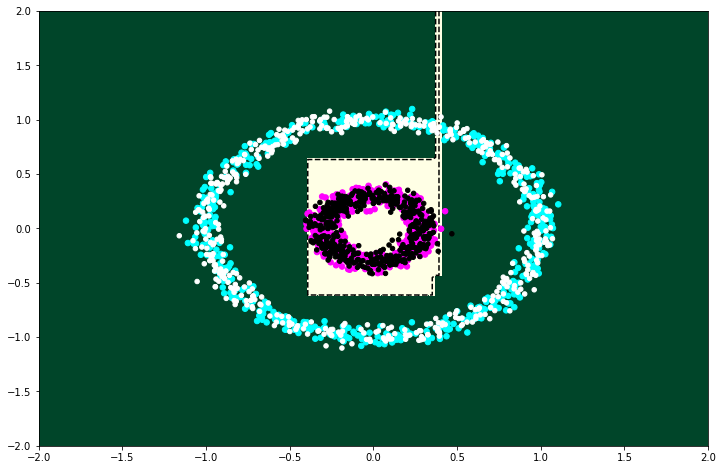

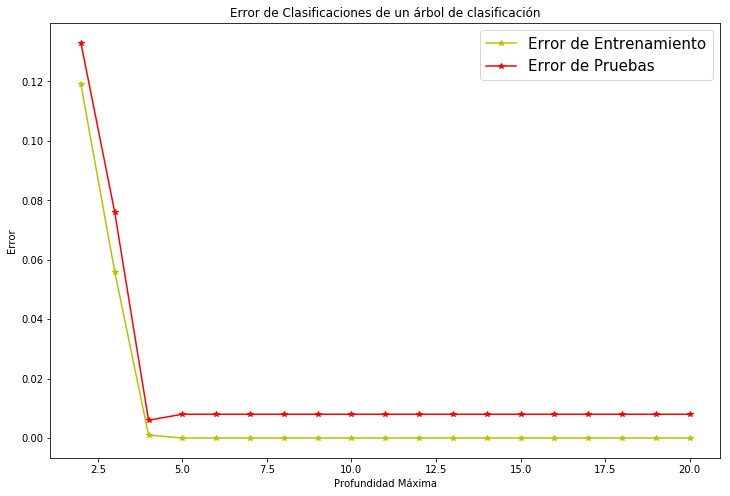

In [18]:
lista=range(2,21)
train_err=[]
test_err=[]
for n_t in lista:
    clf=Tree(criterion='gini',splitter='best',random_state=0,max_depth=n_t)
    clf.fit(X_train,Y_train)
    tr_err = 1-clf.score(X_train,Y_train)
    t_err = 1-clf.score(X_test,Y_test)
    train_err.append(tr_err)
    test_err.append(t_err)
    if n_t==2 or n_t==5:
        plot_classifier(clf,X_train,Y_train,X_test,Y_test,"tree")

plt.figure(1, figsize = (12, 8))
plt.plot(lista,train_err, "*y-")
plt.plot(lista,test_err, "*r-")
plt.title('Error de Clasificaciones de un árbol de clasificación')
plt.xlabel("Profundidad Máxima")
plt.ylabel("Error")
plt.legend(["Error de Entrenamiento", "Error de Pruebas"], prop={'size': 15})

plt.show()


Se logra apreciar como a medida que se aumenta la profundidad, se disminuye más el error tanto de entrenamiento como de pruebas. Se aprecia además en el primero gráfico de los datos como se comienzan a adaptar la forma de las clasificaciones a la disposición de los datos. Esto queda mejor demostrado en el último gráfico impreso, el cual no corresponde a la última representación del problema, ya que luego de cierto umbral se comienza a presentar overfitting.

### 1.f)

In [23]:
from sklearn.decomposition import KernelPCA
kpca = KernelPCA(n_components=2,kernel="rbf", gamma=5)
kpca = kpca.fit(X_train)
Xkpca_train = kpca.transform(X_train)
Xkpca_test = kpca.transform(X_test)

### 1.g)

Epoch 1/50
1000/1000 [==============================] - 1s 697us/step - loss: 0.6926 - acc: 0.5700
Epoch 2/50
1000/1000 [==============================] - 0s 11us/step - loss: 0.6676 - acc: 0.6910
Epoch 3/50
1000/1000 [==============================] - 0s 13us/step - loss: 0.4546 - acc: 0.9910
Epoch 4/50
1000/1000 [==============================] - 0s 11us/step - loss: 0.1897 - acc: 1.0000
Epoch 5/50
1000/1000 [==============================] - 0s 11us/step - loss: 0.0953 - acc: 1.0000
Epoch 6/50
1000/1000 [==============================] - 0s 11us/step - loss: 0.0611 - acc: 1.0000
Epoch 7/50
1000/1000 [==============================] - 0s 11us/step - loss: 0.0441 - acc: 1.0000
Epoch 8/50
1000/1000 [==============================] - 0s 11us/step - loss: 0.0342 - acc: 1.0000
Epoch 9/50
1000/1000 [==============================] - 0s 11us/step - loss: 0.0278 - acc: 1.0000
Epoch 10/50
1000/1000 [==============================] - 0s 12us/step - loss: 0.0234 - acc: 1.0000
Epoch 11/50
1000/1

C:\Users\Gabriel\Anaconda3\lib\site-packages\matplotlib\contour.py:1180: UserWarning: No contour levels were found within the data range.
  warnings.warn("No contour levels were found"


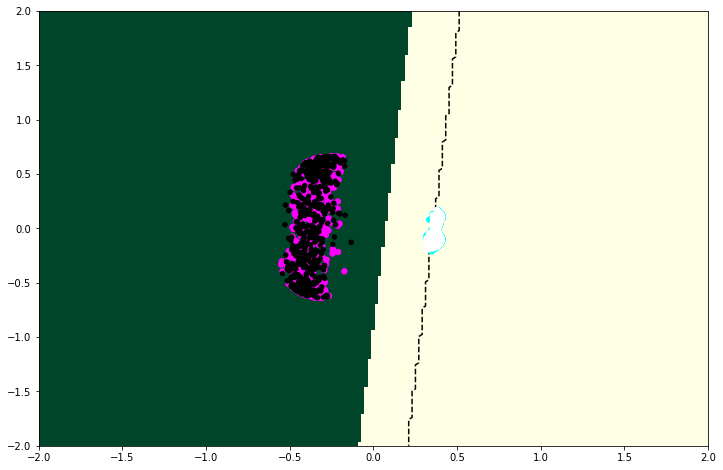

Red de una neurona:
Error de entrenamiento = 0.00288534701988
Error de pruebas = 0.00297016891651


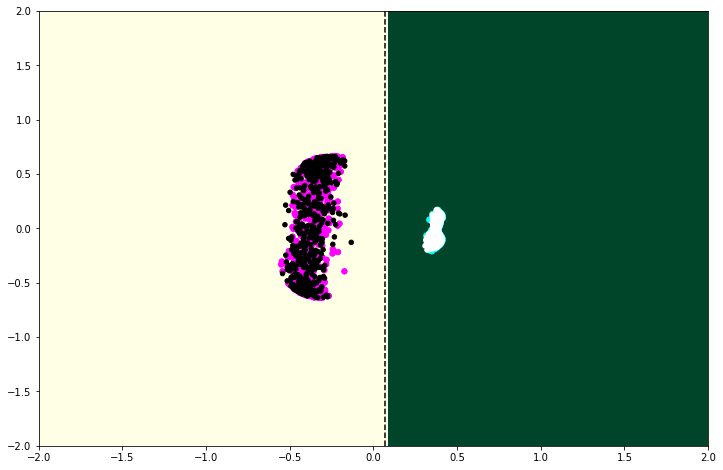

Árbol de profundidad 1:
Error de entrenamiento = 0.0
Error de pruebas = 0.0


In [34]:
model = Sequential()
model.add(Dense(1,input_dim=Xkpca_train.shape[1], kernel_initializer='uniform', activation='relu'))
model.add(Dense(1, kernel_initializer='uniform', activation='sigmoid'))
model.compile(optimizer=SGD(lr=1), loss='binary_crossentropy', metrics=['accuracy'])
model.fit(Xkpca_train, Y_train,epochs=50, batch_size=100, verbose=1)
tr_err = model.evaluate(Xkpca_train, Y_train) 
t_err = model.evaluate(Xkpca_test, Y_test)
plot_classifier(model,Xkpca_train,Y_train,Xkpca_test,Y_test,"ann")

print("Red de una neurona:")
print ("Error de entrenamiento =",tr_err[0])
print ("Error de pruebas =",t_err[0])

clf=Tree(criterion='gini',splitter='best',random_state=0,max_depth=1)
clf.fit(Xkpca_train,Y_train)
tr_err = 1 - clf.score(Xkpca_train, Y_train)
t_err = 1 - clf.score(Xkpca_test, Y_test) 
plot_classifier(clf,Xkpca_train,Y_train,Xkpca_test,Y_test,'tree')


print("Árbol de profundidad 1:")
print ("Error de entrenamiento =",tr_err)
print ("Error de pruebas =",t_err)


Ya que anteriormente se concluyó que una red neuronal de una neurona y los árboles con profunidad 1 tratan el problema como uno linealmente separable, se aprovechó para analizar su desempeño resolviendo el problema en 2 dimensiones. Con los resultados obtenidos, se observa que el árbol posee un mayor desempeño ya que resuelve el problema, diviendo el conjunto perfectamente. Sin embargo, estos resultados podrían no ser representativos del caso. 

## Pregunta 2

### 2.a)

In [36]:
dftrain = pd.read_csv('bike_sharing_train.csv')
dfval = pd.read_csv('bike_sharing_val.csv')
dftest = pd.read_csv('bike_sharing_test.csv')
ntrain = len(dftrain)
nval = len(dftrain) + len(dfval)
df = pd.concat([dftrain,dfval,dftest])
print ('\nSummary - dataframe completo:\n')
print (df.describe())
df['hour'] = pd.to_datetime(df['datetime']).apply(lambda x: x.strftime('%H'))
df['hour'] = pd.to_numeric(df['hour'])


Summary - dataframe completo:

         Unnamed: 0        season       holiday    workingday       weather  \
count  10886.000000  10886.000000  10886.000000  10886.000000  10886.000000   
mean    5442.500000      2.506614      0.028569      0.680875      1.418427   
std     3142.661849      1.116174      0.166599      0.466159      0.633839   
min        0.000000      1.000000      0.000000      0.000000      1.000000   
25%     2721.250000      2.000000      0.000000      0.000000      1.000000   
50%     5442.500000      3.000000      0.000000      1.000000      1.000000   
75%     8163.750000      4.000000      0.000000      1.000000      2.000000   
max    10885.000000      4.000000      1.000000      1.000000      4.000000   

              temp         atemp      humidity     windspeed        casual  \
count  10886.00000  10886.000000  10886.000000  10886.000000  10886.000000   
mean      20.23086     23.655084     61.886460     12.799395     36.021955   
std        7.79159    

### 2.b)

SCORE TEST=0.703388
KAGG EVAL TRAIN =0.028516
KAGG EVAL TEST =0.574239


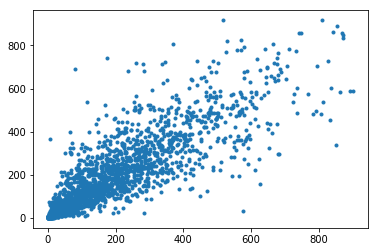

In [41]:
from sklearn.tree import DecisionTreeRegressor as Tree
def eval_bikemodel(y_predict,y_true):
    diff = np.log(y_predict+1.0) - np.log(y_true+1.0)
    return np.sqrt(np.sum(np.square(diff))/len(y_predict))

Xdf=df.loc[:,['season','holiday','workingday','weather','temp','atemp','humidity','windspeed','hour']]
Ydf=df.loc[:,'count']
X_train = Xdf[0:ntrain].values
X_val = Xdf[ntrain:nval].values
X_test = Xdf[nval:].values
Y_train = Ydf[0:ntrain].values
Y_val = Ydf[ntrain:nval].values
Y_test = Ydf[nval:].values

model = Tree(random_state=0)
model.fit(X_train,Y_train)
score_test = model.score(X_test,Y_test)
print ("SCORE TEST=%f"%score_test)

Y_pred_train = model.predict(X_train)
Y_pred_val = model.predict(X_val)
Y_pred_test = model.predict(X_test)
kagg_train = eval_bikemodel(Y_pred_train,Y_train)
kagg_val = eval_bikemodel(Y_pred_val,Y_val)
kagg_test = eval_bikemodel(Y_pred_test,Y_test)

print ("KAGG EVAL TRAIN =%f"%kagg_train)
print ("KAGG EVAL TEST =%f"%kagg_test)
plt.plot(Y_test,Y_pred_test,'.')
plt.show()

### 2.c)

In [42]:
model = Tree(random_state=0,max_depth=20)
model.fit(X_train,Y_train)
Y_pred_val = model.predict(X_val)
kagg_val = eval_bikemodel(Y_pred_val,Y_val)
print ("KAGG EVAL VAL =%f"%kagg_val)

KAGG EVAL VAL =0.546219


### 2.d)

In [44]:
df['cday'] = pd.to_datetime(df['datetime']).dt.dayofweek #0:lunes,6:domingo
df['cday'] = pd.to_numeric(df['cday'])
Xdf=df.ix[:,['season','holiday','workingday','weather','temp','atemp','humidity','windspeed','hour','cday']]

### 2.e)

In [50]:
#load dataframes as before ...
df = pd.concat([dftrain,dfval,dftest])
df['hour'] = pd.to_datetime(df['datetime']).apply(lambda x: x.strftime('%H'))
df['cday'] = pd.to_datetime(df['datetime']).dt.dayofweek
df['hour'] = pd.to_numeric(df['hour'])
df['cday'] = pd.to_numeric(df['cday'])
Xdf=df.loc[:,['season','holiday','workingday','weather','temp','atemp','humidity','windspeed','hour','cday']]

#PASO IMPORTANTE MAS ABAJO ...

Xdf = pd.get_dummies(Xdf,columns=['season', 'weather','hour','cday'])
Ydf=df.loc[:,'count']

from sklearn.preprocessing import StandardScaler
scalerX = StandardScaler()
X_train = scalerX.fit_transform(X_train)
X_val = scalerX.fit_transform(X_val)
X_test = scalerX.transform(X_test)

from sklearn.svm import SVR
model = SVR()
model.fit(X_train,Y_train)
Y_pred_train = model.predict(X_train)
Y_pred_val = model.predict(X_val)
Y_pred_test = model.predict(X_test)

### 2.f)

In [51]:
model = SVR(C=1,epsilon=0.01)
kagg_train = eval_bikemodel(Y_pred_train,Y_train)
kagg_val = eval_bikemodel(Y_pred_val,Y_val)
print ("KAGG EVAL TRAIN =%f"%kagg_train)
print ("KAGG EVAL VAL =%f"%kagg_val)

KAGG EVAL TRAIN =nan
KAGG EVAL VAL =nan


C:\Users\Gabriel\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until


### 2.g)

In [ ]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=10)
mse_cv = 0
for train, val in kf.split(Xm):
    model = #define your model
    model.fit(Xm[train], ym[train])
    yhat_val = model.predict(Xm[val])
    ytrue_val = ym[val]
    score_fold = eval_bikemodel(yhat_val,ytrue_val)
    mse_cv += score_fold
mse_cv = mse_cv / 10

### 2.h)

In [ ]:
Ydf=df.loc[:,'count'] #demanda total
2 Ydf=df.loc[:,'registered'] #demanda registrada
3 Ydf=df.loc[:,'casual'] #demanda casual

### 2.i)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=10,max_depth=max_depth,random_state=0)

## Pregunta 3

### 3.a)

In [53]:
df_red = pd.read_csv("winequality-red.csv",sep=";")
df_white = pd.read_csv("winequality-white.csv",sep=";")
df = pd.concat([df_red,df_white], axis=0)
#genere atributo tipo

### 3.b)

In [ ]:
df['good_quality'] = [1 if q>5 else 0 for q in df.quality] #then remove quality from df 
#train and test split over df

### 3.c)

In [ ]:
#ohno

### 3.d)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=, max_depth=,n_jobs=-1)
from sklearn.metrics import f1_score
f1_score(y_true, y_pred)

### 3.e)

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
model = AdaBoostClassifier(base_estimator=Tree(max_depth=), n_estimators=)

### 3.f)

In [ ]:
#AAAAAAAAAH

### 3.g)

## Pregunta 4

### 4.a)

In [35]:
from sklearn.model_selection import train_test_split
def load_data():
    train = pd.read_csv('sign_mnist_train.csv')
    test = pd.read_csv('sign_mnist_test.csv')
        
    y_tr = train['label']
    x_tr = train.iloc[:,1:]
    y_t = test['label']
    x_t = test.iloc[:,1:]
    
    x_tr,x_v,y_tr,y_v = train_test_split(x_tr, y_tr, test_size=7000, random_state=50)
    return(x_tr,x_v,x_t,y_tr,y_v,y_t)

x_tr, x_v, x_t, y_tr, y_v , y_t= load_data()

### 4.b)

In [36]:
from sklearn.preprocessing import StandardScaler

def escalar(x_tr,x_v,x_t):
    x_tr=x_tr/255
    x_t=x_t/255
    x_v=x_v/255
    
    return (x_tr,x_v,x_t)

def estandarizar(x_tr,x_v,x_t):
    std = StandardScaler(with_mean=True)
    x_tr_scaled = pd.DataFrame(std.fit_transform(x_tr), columns=x_tr.columns)
    x_t_scaled = pd.DataFrame(std.transform(x_t), columns=x_t.columns)
    x_v_scaled = pd.DataFrame(std.transform(x_v), columns=x_v.columns)
    return (x_tr_scaled,x_v_scaled,x_t_scaled)

def graficar_loss(historia):
    datos=historia.history['val_loss']
    plt.figure(figsize = (16, 5))
    plt.xlabel('Epochs')
    plt.ylabel('Validation Loss')
    plt.plot([i for i in range(len(datos))],datos, 'g*-')
    plt.plot([0.2]*len(datos),'r')
    plt.legend("Error de validación")
    plt.show()

### 4.c)

In [37]:
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import SGD
from keras.utils.np_utils import to_categorical

model = Sequential()
model.add(Dense(30, input_dim=x_tr.shape[1], kernel_initializer='uniform', activation='relu'))
model.add(Dense(30, kernel_initializer='uniform', activation='relu'))
model.add(Dense(25, kernel_initializer='uniform', activation='softmax'))
model.compile(optimizer=SGD(lr=0.05), loss='categorical_crossentropy', metrics=['accuracy'])
historia = model.fit(x_tr.values, to_categorical(y_tr), epochs=100, batch_size=128, verbose=1,validation_data=(x_v.values,to_categorical(y_v)))

Train on 20455 samples, validate on 7000 samples
Epoch 1/100
20455/20455 [==============================] - 2s 81us/step - loss: 3.5161 - acc: 0.0420 - val_loss: 3.2075 - val_acc: 0.0487
Epoch 2/100
20455/20455 [==============================] - 1s 40us/step - loss: 3.2043 - acc: 0.0458 - val_loss: 3.2006 - val_acc: 0.0490
Epoch 3/100
20455/20455 [==============================] - 1s 40us/step - loss: 3.1988 - acc: 0.0450 - val_loss: 3.1961 - val_acc: 0.0463
Epoch 4/100
20455/20455 [==============================] - 1s 40us/step - loss: 3.1951 - acc: 0.0474 - val_loss: 3.1930 - val_acc: 0.0463
Epoch 5/100
20455/20455 [==============================] - 1s 39us/step - loss: 3.1925 - acc: 0.0474 - val_loss: 3.1907 - val_acc: 0.0463
Epoch 6/100
20455/20455 [==============================] - 1s 39us/step - loss: 3.1904 - acc: 0.0474 - val_loss: 3.1888 - val_acc: 0.0463
Epoch 7/100
20455/20455 [==============================] - 1s 42us/step - loss: 3.1889 - acc: 0.0474 - val_loss: 3.1874 - v

20455/20455 [==============================] - 1s 42us/step - loss: 3.1779 - acc: 0.0474 - val_loss: 3.1771 - val_acc: 0.0463
Epoch 60/100
20455/20455 [==============================] - 1s 40us/step - loss: 3.1779 - acc: 0.0474 - val_loss: 3.1770 - val_acc: 0.0463
Epoch 61/100
20455/20455 [==============================] - 1s 39us/step - loss: 3.1778 - acc: 0.0474 - val_loss: 3.1770 - val_acc: 0.0463
Epoch 62/100
20455/20455 [==============================] - 1s 40us/step - loss: 3.1778 - acc: 0.0474 - val_loss: 3.1770 - val_acc: 0.0463
Epoch 63/100
20455/20455 [==============================] - 1s 40us/step - loss: 3.1778 - acc: 0.0474 - val_loss: 3.1769 - val_acc: 0.0463
Epoch 64/100
20455/20455 [==============================] - 1s 41us/step - loss: 3.1777 - acc: 0.0474 - val_loss: 3.1769 - val_acc: 0.0463
Epoch 65/100
20455/20455 [==============================] - 1s 41us/step - loss: 3.1777 - acc: 0.0474 - val_loss: 3.1769 - val_acc: 0.0463
Epoch 66/100
20455/20455 [==============

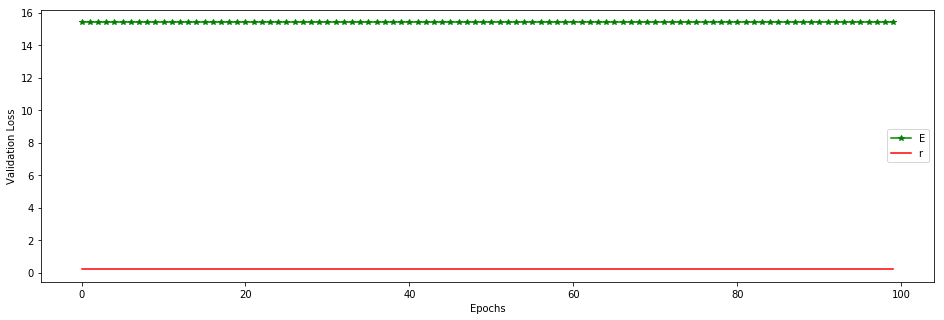

In [67]:
graficar_loss(historia)

<p>Al aplicar un modelo neuronal de 3 capas sobre los datos "brutos", se obtienen errores de validación absurdamente altos (val_loss: 15.4619), los cuales se mantenienen e una linea constante tal cual se aprecia en el gráfico. Una nueva configuración a probar será aplicando el modelo a los datos escalados según la cantidad máxima de los pixeles.</p>

In [48]:
x_tr_scaled,x_v_scaled,x_t_scaled=escalar(x_tr,x_v,x_t)

model = Sequential()
model.add(Dense(30, input_dim=x_tr_scaled.shape[1], kernel_initializer='uniform', activation='relu'))
model.add(Dense(30, kernel_initializer='uniform', activation='relu'))
model.add(Dense(25, kernel_initializer='uniform', activation='softmax'))
model.compile(optimizer=SGD(lr=0.05), loss='categorical_crossentropy', metrics=['accuracy'])
historia = model.fit(x_tr_scaled.values, to_categorical(y_tr), epochs=100, batch_size=128, verbose=1,validation_data=(x_v_scaled.values,to_categorical(y_v)))

Train on 20455 samples, validate on 7000 samples
Epoch 1/100
20455/20455 [==============================] - 2s 91us/step - loss: 3.2122 - acc: 0.0471 - val_loss: 3.2058 - val_acc: 0.0463
Epoch 2/100
20455/20455 [==============================] - 1s 41us/step - loss: 3.2000 - acc: 0.0506 - val_loss: 3.1917 - val_acc: 0.0463
Epoch 3/100
20455/20455 [==============================] - 1s 41us/step - loss: 3.1847 - acc: 0.0511 - val_loss: 3.1776 - val_acc: 0.0439
Epoch 4/100
20455/20455 [==============================] - 1s 41us/step - loss: 3.1750 - acc: 0.0505 - val_loss: 3.1689 - val_acc: 0.0487
Epoch 5/100
20455/20455 [==============================] - 1s 41us/step - loss: 3.1643 - acc: 0.0632 - val_loss: 3.1486 - val_acc: 0.0929
Epoch 6/100
20455/20455 [==============================] - 1s 42us/step - loss: 3.0797 - acc: 0.0927 - val_loss: 2.9449 - val_acc: 0.1151
Epoch 7/100
20455/20455 [==============================] - 1s 43us/step - loss: 2.8919 - acc: 0.1061 - val_loss: 2.7710 - v

20455/20455 [==============================] - 1s 44us/step - loss: 0.3339 - acc: 0.8985 - val_loss: 0.2328 - val_acc: 0.9299
Epoch 60/100
20455/20455 [==============================] - 1s 44us/step - loss: 0.3523 - acc: 0.8922 - val_loss: 0.2175 - val_acc: 0.9351
Epoch 61/100
20455/20455 [==============================] - 1s 47us/step - loss: 0.2988 - acc: 0.9187 - val_loss: 0.2734 - val_acc: 0.9071
Epoch 62/100
20455/20455 [==============================] - 1s 48us/step - loss: 0.3279 - acc: 0.9034 - val_loss: 0.1715 - val_acc: 0.9530
Epoch 63/100
20455/20455 [==============================] - 1s 44us/step - loss: 0.5261 - acc: 0.8603 - val_loss: 0.3408 - val_acc: 0.8803
Epoch 64/100
20455/20455 [==============================] - 1s 43us/step - loss: 0.2828 - acc: 0.9266 - val_loss: 0.7693 - val_acc: 0.7484
Epoch 65/100
20455/20455 [==============================] - 1s 43us/step - loss: 0.3289 - acc: 0.9050 - val_loss: 0.2227 - val_acc: 0.9289
Epoch 66/100
20455/20455 [==============

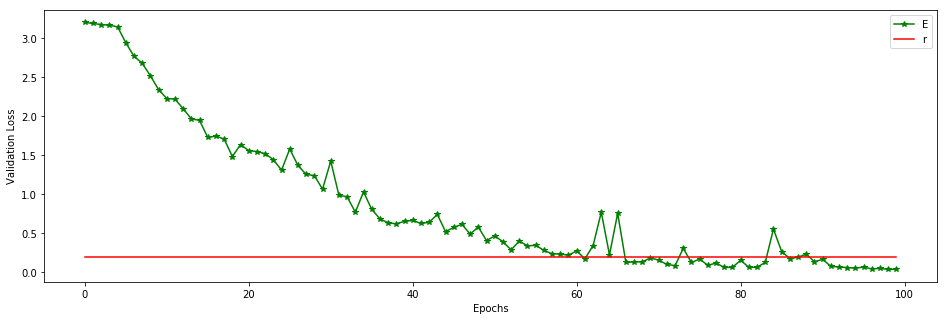

In [49]:
graficar_loss(historia)

<p>Se logra una considerable disminución del error de validación, llegando a estar por debajo del valor 0,2. Sin embargo, se buscará estabilizar este error para asegurar que no supere el umbral ya mencionado. Para esto, se añadirán capas en la red y se modificará la cantidad de neuronas presentes, aumentando las de entrada y disminuyendolas en las posteriores.</p>

In [56]:
model = Sequential()
model.add(Dense(200, input_dim=x_tr.shape[1], kernel_initializer='uniform', activation='relu'))
model.add(Dense(175, kernel_initializer='uniform', activation='relu'))
model.add(Dense(150, kernel_initializer='uniform', activation='relu'))
model.add(Dense(125, kernel_initializer='uniform', activation='relu'))
model.add(Dense(100, kernel_initializer='uniform', activation='relu'))
model.add(Dense(75, kernel_initializer='uniform', activation='relu'))
model.add(Dense(50, kernel_initializer='uniform', activation='relu'))
model.add(Dense(25, kernel_initializer='uniform', activation='softmax'))
model.compile(optimizer=SGD(lr=0.05), loss='categorical_crossentropy', metrics=['accuracy'])
historia = model.fit(x_tr.values, to_categorical(y_tr), epochs=100, batch_size=128, verbose=1,validation_data=(x_v.values,to_categorical(y_v)))

Train on 20455 samples, validate on 7000 samples
Epoch 1/100
20455/20455 [==============================] - 3s 133us/step - loss: 3.2109 - acc: 0.0457 - val_loss: 3.1994 - val_acc: 0.0470
Epoch 2/100
20455/20455 [==============================] - 2s 75us/step - loss: 3.1849 - acc: 0.0437 - val_loss: 3.1771 - val_acc: 0.0510
Epoch 3/100
20455/20455 [==============================] - 2s 75us/step - loss: 3.1682 - acc: 0.0508 - val_loss: 3.2389 - val_acc: 0.0414
Epoch 4/100
20455/20455 [==============================] - 2s 75us/step - loss: 3.1231 - acc: 0.0659 - val_loss: 3.1684 - val_acc: 0.0583
Epoch 5/100
20455/20455 [==============================] - 2s 75us/step - loss: 3.0896 - acc: 0.0685 - val_loss: 3.0449 - val_acc: 0.0646
Epoch 6/100
20455/20455 [==============================] - 2s 76us/step - loss: 3.0097 - acc: 0.0747 - val_loss: 2.8770 - val_acc: 0.0886
Epoch 7/100
20455/20455 [==============================] - 2s 76us/step - loss: 2.8931 - acc: 0.0910 - val_loss: 2.8569 - 

20455/20455 [==============================] - 2s 75us/step - loss: 2.6067 - acc: 0.1612 - val_loss: 2.3117 - val_acc: 0.2010
Epoch 60/100
20455/20455 [==============================] - 2s 74us/step - loss: 2.4226 - acc: 0.1768 - val_loss: 2.2465 - val_acc: 0.2060
Epoch 61/100
20455/20455 [==============================] - 2s 75us/step - loss: 2.6343 - acc: 0.1361 - val_loss: 2.5799 - val_acc: 0.1269
Epoch 62/100
20455/20455 [==============================] - 2s 75us/step - loss: 3.0388 - acc: 0.0794 - val_loss: 2.8971 - val_acc: 0.0883
Epoch 63/100
20455/20455 [==============================] - 2s 75us/step - loss: 2.6628 - acc: 0.1243 - val_loss: 2.4603 - val_acc: 0.1623
Epoch 64/100
20455/20455 [==============================] - 2s 75us/step - loss: 2.7713 - acc: 0.1137 - val_loss: 2.4758 - val_acc: 0.1583
Epoch 65/100
20455/20455 [==============================] - 2s 75us/step - loss: 2.5530 - acc: 0.1457 - val_loss: 2.4215 - val_acc: 0.1526
Epoch 66/100
20455/20455 [==============

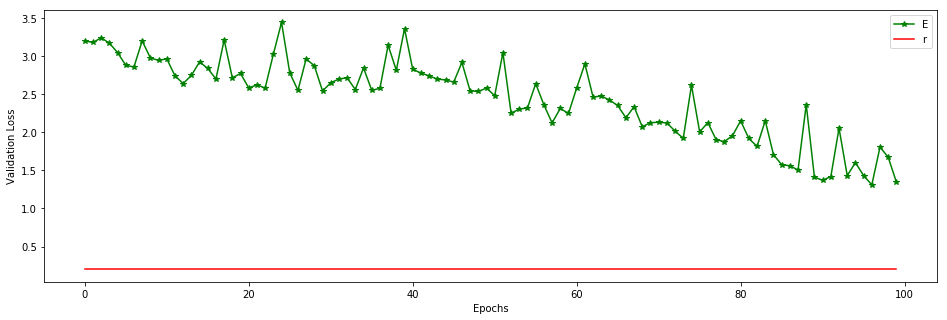

In [57]:
graficar_loss(historia)

In [59]:
scores = model.evaluate(x_t, to_categorical(y_t))
print ("El error de pruebas es de", scores[1])

7172/7172 [==============================] - 0s 57us/step
El error de pruebas es de 0.35192414947


<p>Se logra apreciar que no se consigue una buena disminución del error de pruebas. Con esto se puede concluir que estimar los valores y parámetros necesarios para una red neuronal no es una tarea fácil dado que se tendría que disponer de bastante tiempo y pruebas de varios datos para realizar una buena estimación de los parámetros requeridos.</p>

### 4.e)

In [ ]:
from sklearn.svm import SVC as SVM

svm= SVM()
svm.set_params(kernel='rbf')
svm.fit(x_tr,y_tr)
y_pred = svm.predict(x_t)
score = 1-accuracy_score(y_t, y_pred)
print(score)

x_tr_scaled,x_v_scaled,x_t_scaled=escalar(x_tr,x_v,x_t)
svm= SVM()
svm.set_params(kernel='rbf')
svm.fit(x_tr_scaled,y_tr)
y_pred = svm.predict(x_t_scaled)
score = 1-accuracy_score(y_t, y_pred)
print(score)

### 4.f)

In [66]:
"""
mayor=0
for i in range(26,31):
    clf=Tree(criterion='gini',splitter='best',random_state=0,max_depth=i)
    clf.fit(x_tr,y_tr)
    acc_test = clf.score(x_v,y_v)
    if acc_test>mayor:
        mayor=acc_test
        pos=i
#La mejor profundidad encontrada fue 28
"""

clf=Tree(criterion='gini',splitter='best',random_state=0,max_depth=28)
clf.fit(x_tr,y_tr)
acc_test = clf.score(x_t,y_t)
print ("El error de pruebas sin escalar es", 1 - acc_test)

x_tr_scaled,x_v_scaled,x_t_scaled=escalar(x_tr,x_v,x_t)

clf=Tree(criterion='gini',splitter='best',random_state=0,max_depth=28)
clf.fit(x_tr_scaled,y_tr)
acc_test = clf.score(x_t_scaled,y_t)
print ("El error de pruebas con escalar es",1 - acc_test)

El error de pruebas sin escalar es 0.584634690463
El error de pruebas con escalar es 0.584634690463


Se observa que el desempeño en árboles de decisión es equivalente para datos con o sin pre-procesamiento. Además, presentan un menor desempeño que los modelos anteriores. Esta igualdad entre los tipos de datos podría darse porque a pesar de que los datos cambian, mantienen sus proporciones y sus distribuciones, por lo que no alteran las divisiones provocadas por lo árboles.